In [13]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [16]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-73.99935477984403 22.31753081001895
36.492313388262644 78.13402862166356
-36.720556617534996 -48.176968687565335
55.322280562891706 27.09489229650697
80.68882200000559 -164.4949859005927
-87.27936582876671 -104.1986536544405
0.8411314589323382 -64.29124598606623
-49.38471223215698 -120.06138665078868
-30.541473228943794 -23.360774309623366
38.11389473392413 171.5239640988013
28.179962898124842 48.174433382834195
-44.36892791865735 -123.47959675937574
74.90464269831972 39.60048836079724
20.537512776955552 -168.54561616519433
77.11855124683578 -160.33708945239218
61.43101535006795 -74.36025448424321
-75.3022211315678 -42.46747178164321
89.81577416779675 -39.1708793305302
-88.99670326941362 -57.072704031660805
-52.93512769982402 66.97917241844124
26.96839974791348 -139.1463228240892
-50.4478074472389 -43.9803718068581
-42.58284052138558 123.33049918992577
37.07003634921436 -45.12938684055996
48.21168930809634 130.64501819720562
-27.728124335069296 -8.845908330766548
82.07929459880893 -14

In [17]:
from citipy import citipy

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [19]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [20]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ffd1aa092f0b3de335bb7f4951b2491"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ffd1aa092f0b3de335bb7f4951b2491


In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

   # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | shache
Processing Record 3 of Set 1 | santa vitoria do palmar
Processing Record 4 of Set 1 | braslav
City not found. Skipping...
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | santa isabel do rio negro
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | vila velha
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | bayan
Processing Record 12 of Set 1 | ostrovnoy
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | torbay
Processing Record 22 of 

Processing Record 36 of Set 4 | verkhnyaya toyma
Processing Record 37 of Set 4 | berlevag
Processing Record 38 of Set 4 | boa vista
Processing Record 39 of Set 4 | umm lajj
Processing Record 40 of Set 4 | visnes
Processing Record 41 of Set 4 | tabou
Processing Record 42 of Set 4 | vardo
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | fortuna
Processing Record 45 of Set 4 | daru
Processing Record 46 of Set 4 | kashi
Processing Record 47 of Set 4 | batagay-alyta
Processing Record 48 of Set 4 | morehead
Processing Record 49 of Set 4 | lavrentiya
Processing Record 50 of Set 4 | anamur
Processing Record 1 of Set 5 | homer
Processing Record 2 of Set 5 | port moresby
Processing Record 3 of Set 5 | kaitangata
Processing Record 4 of Set 5 | andapa
Processing Record 5 of Set 5 | richards bay
Processing Record 6 of Set 5 | khatanga
Processing Record 7 of Set 5 | saverne
Processing Record 8 of Set 5 | coffs harbour
Processing Record 9 of Set 5 | minab
Processing Record 1

Processing Record 23 of Set 8 | kavaratti
Processing Record 24 of Set 8 | mehran
Processing Record 25 of Set 8 | makakilo city
Processing Record 26 of Set 8 | mmabatho
Processing Record 27 of Set 8 | aswan
Processing Record 28 of Set 8 | tres lagoas
Processing Record 29 of Set 8 | poum
Processing Record 30 of Set 8 | uyuni
Processing Record 31 of Set 8 | teul
City not found. Skipping...
Processing Record 32 of Set 8 | port macquarie
Processing Record 33 of Set 8 | klaksvik
Processing Record 34 of Set 8 | krasnyy chikoy
Processing Record 35 of Set 8 | haines junction
Processing Record 36 of Set 8 | mae sai
Processing Record 37 of Set 8 | akureyri
Processing Record 38 of Set 8 | gat
Processing Record 39 of Set 8 | fomboni
Processing Record 40 of Set 8 | monforte de lemos
Processing Record 41 of Set 8 | san andres
Processing Record 42 of Set 8 | port augusta
Processing Record 43 of Set 8 | moron
Processing Record 44 of Set 8 | kabansk
Processing Record 45 of Set 8 | quanzhou
Processing Re

Processing Record 14 of Set 12 | ipanguacu
Processing Record 15 of Set 12 | banda aceh
Processing Record 16 of Set 12 | pedasi
Processing Record 17 of Set 12 | itoman
Processing Record 18 of Set 12 | gamba
Processing Record 19 of Set 12 | teguise
Processing Record 20 of Set 12 | kasongo-lunda
Processing Record 21 of Set 12 | simplicio mendes
Processing Record 22 of Set 12 | half moon bay
Processing Record 23 of Set 12 | zima
Processing Record 24 of Set 12 | nuuk
Processing Record 25 of Set 12 | oistins
Processing Record 26 of Set 12 | guiratinga
Processing Record 27 of Set 12 | malinovoye ozero
Processing Record 28 of Set 12 | den helder
Processing Record 29 of Set 12 | maiduguri
Processing Record 30 of Set 12 | pujili
Processing Record 31 of Set 12 | pampierstad
Processing Record 32 of Set 12 | port lincoln
Processing Record 33 of Set 12 | basarabeasca
Processing Record 34 of Set 12 | djougou
Processing Record 35 of Set 12 | berberati
Processing Record 36 of Set 12 | westpunt
City not

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,56.23,90,65,5.46,ZA,2022-11-08 02:38:32
1,Shache,38.4167,77.2406,46.92,33,100,2.01,CN,2022-11-08 02:38:32
2,Santa Vitoria Do Palmar,-33.5189,-53.3681,58.37,85,6,8.25,BR,2022-11-08 02:38:33
3,Barrow,71.2906,-156.7887,24.82,80,100,24.16,US,2022-11-08 02:38:33
4,Punta Arenas,-53.1500,-70.9167,50.11,76,0,12.66,CL,2022-11-08 02:38:34
5,Santa Isabel Do Rio Negro,-0.4139,-65.0192,73.92,96,98,1.41,BR,2022-11-08 02:38:34
6,Rikitea,-23.1203,-134.9692,73.81,92,100,16.02,PF,2022-11-08 02:38:34
7,Vila Velha,-20.3297,-40.2925,72.95,84,75,3.44,BR,2022-11-08 02:38:34
8,Nikolskoye,59.7035,30.7861,39.09,92,100,9.86,RU,2022-11-08 02:31:23
9,Bayan,46.0833,127.4000,41.09,42,78,10.40,CN,2022-11-08 02:38:35


In [24]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2022-11-08 02:38:32,-34.5322,20.0403,56.23,90,65,5.46
1,Shache,CN,2022-11-08 02:38:32,38.4167,77.2406,46.92,33,100,2.01
2,Santa Vitoria Do Palmar,BR,2022-11-08 02:38:33,-33.5189,-53.3681,58.37,85,6,8.25
3,Barrow,US,2022-11-08 02:38:33,71.2906,-156.7887,24.82,80,100,24.16
4,Punta Arenas,CL,2022-11-08 02:38:34,-53.1500,-70.9167,50.11,76,0,12.66
...,...,...,...,...,...,...,...,...,...
540,Nipawin,CA,2022-11-08 02:52:08,53.3668,-104.0009,12.24,85,100,16.11
541,Bowen,AU,2022-11-08 02:52:08,-20.0167,148.2333,80.64,57,0,18.79
542,Omboue,GA,2022-11-08 02:52:08,-1.5746,9.2618,75.96,92,100,5.82
543,Mercedes,AR,2022-11-08 02:52:09,-34.6515,-59.4307,63.79,64,0,10.27


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

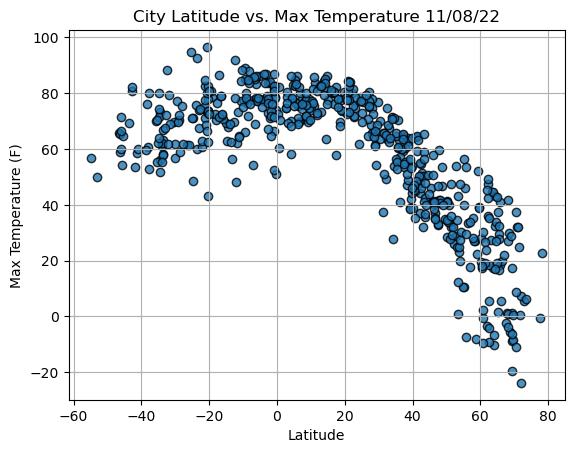

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

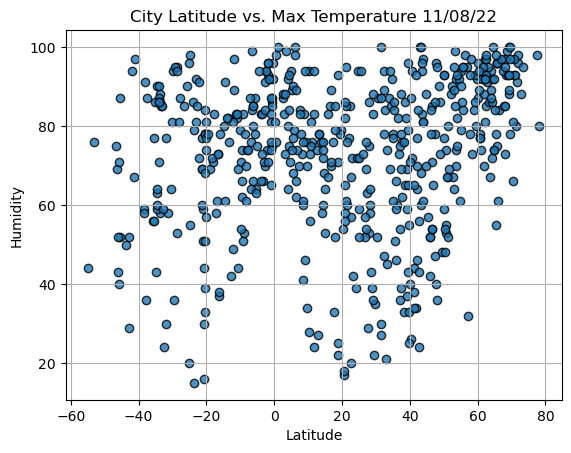

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

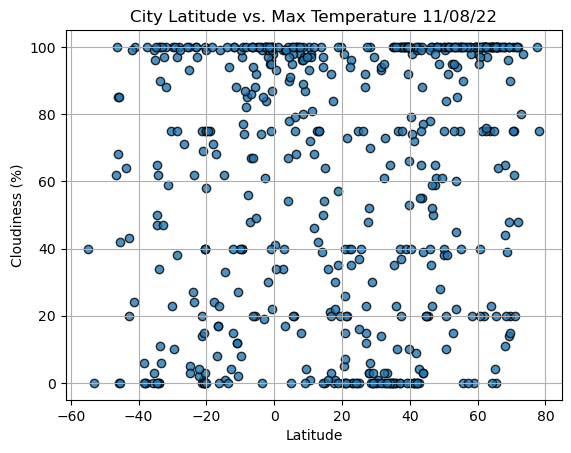

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

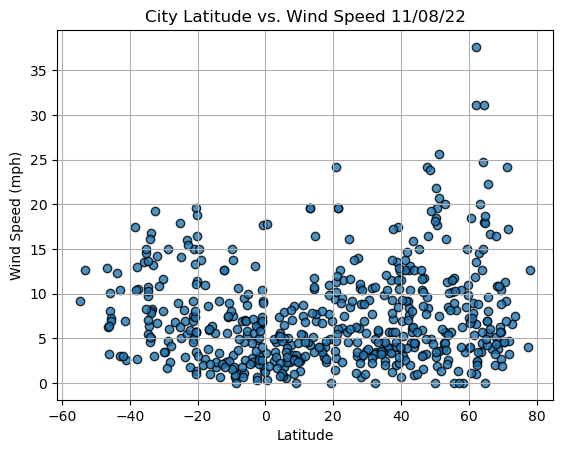

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()